In [51]:
import cv2
import glob
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [20, 10]

In [ ]:
img_no = 94
filelist = sorted(glob.glob('../img/raw/*.jpeg'))
img_bgr = cv2.imread(filelist[img_no])
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
print(filelist[img_no])
imshow(img, cmap = 'gray')

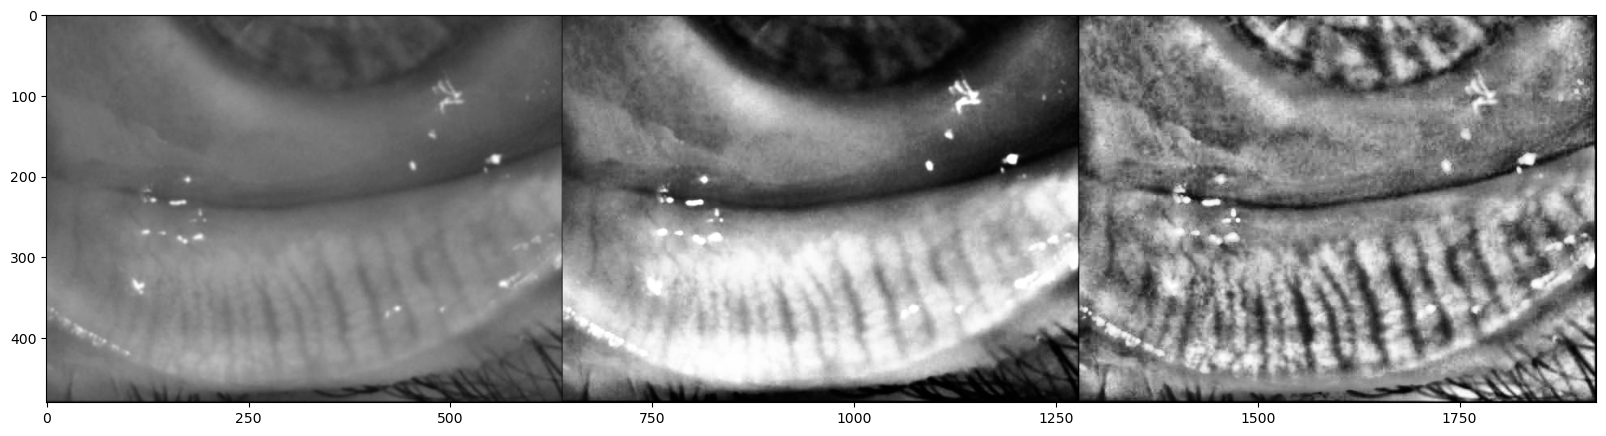

In [85]:
# Hist Eq
res_heq = cv2.equalizeHist(img)
clahe = cv2.createCLAHE(clipLimit=8.0, tileGridSize=(16,16))
res_clahe = clahe.apply(img)
imshow(cv2.hconcat([img, res_heq, res_clahe]), cmap='gray')

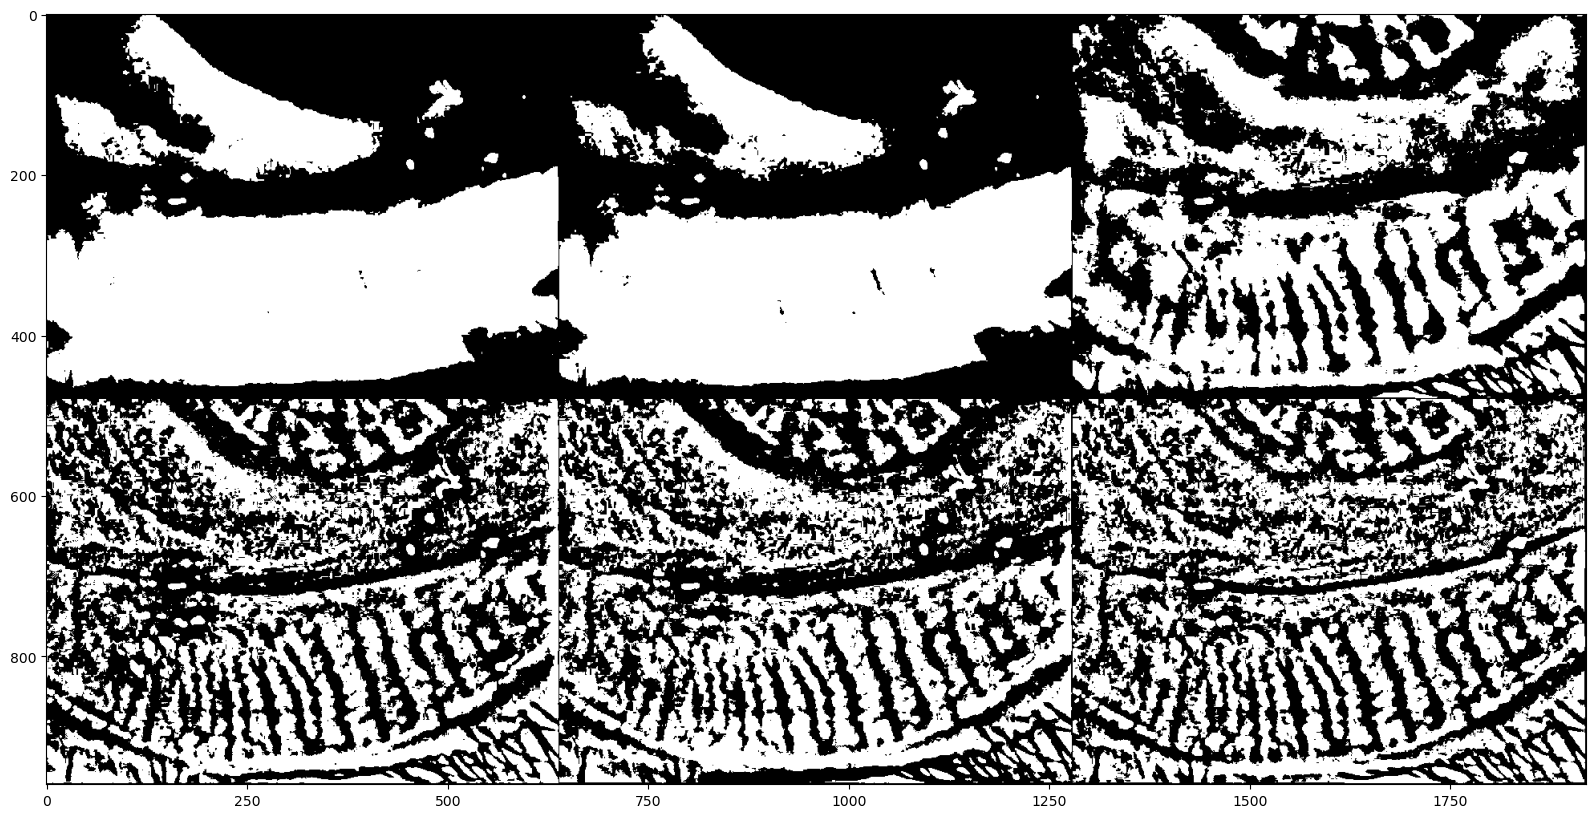

In [97]:
# Thresholding
thr, res_thr_img = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
thr, res_thr_heq = cv2.threshold(res_heq, 0, 255, cv2.THRESH_OTSU)
thr, res_thr_clahe = cv2.threshold(res_clahe, 0, 255, cv2.THRESH_OTSU)

# Adaptive Threshold
res_athr_img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize = 51, C = 0)
res_athr_heq = cv2.adaptiveThreshold(res_heq, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize = 51, C = 0)
res_athr_clahe = cv2.adaptiveThreshold(res_clahe, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize = 51, C = 0)
imshow(cv2.vconcat([cv2.hconcat([res_thr_img, res_thr_heq, res_thr_clahe]) ,cv2.hconcat([res_athr_img, res_athr_heq, res_athr_clahe])]), cmap = 'gray')

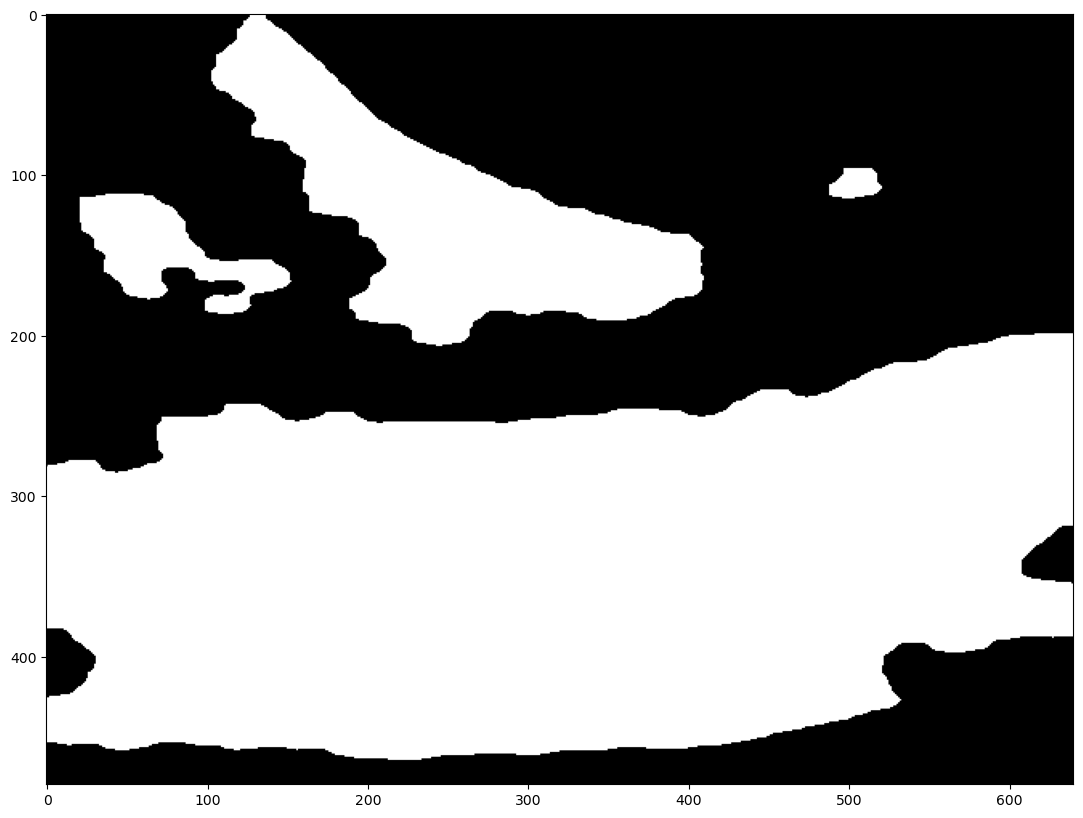

In [98]:
# Morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,10))
res_mor = cv2.morphologyEx(res_thr_img, cv2.MORPH_OPEN, kernel=kernel)
res_mor2 = cv2.morphologyEx(res_mor, cv2.MORPH_CLOSE, kernel=kernel)
imshow(res_mor2, cmap='gray')

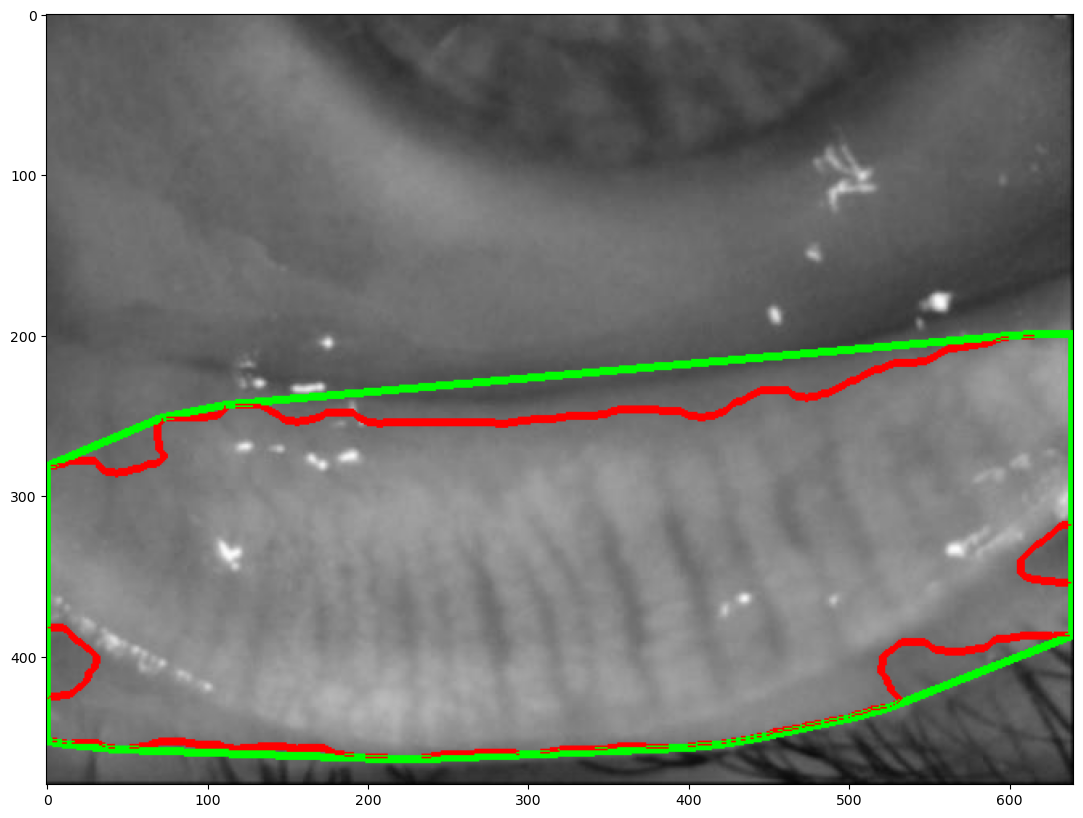

In [124]:
# Blob detector
cnts, _ = cv2.findContours(res_mor2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
mask = np.zeros(img.shape, dtype=np.uint8)
res_cnt = img_bgr.copy()
if len(cnts) != 0:
    sorted_cnts = sorted(cnts, key = cv2.contourArea, reverse=True)
    max_cnt = sorted_cnts[0]
    max_hull = cv2.convexHull(max_cnt)    
    cv2.drawContours(mask, [max_cnt], -1, 255, thickness=cv2.FILLED)
    cv2.drawContours(img_bgr, [max_cnt], -1, [255, 0, 0], thickness=1)
    cv2.drawContours(img_bgr, [max_hull], -1, [0, 255, 0], thickness=1)
imshow(img_bgr)

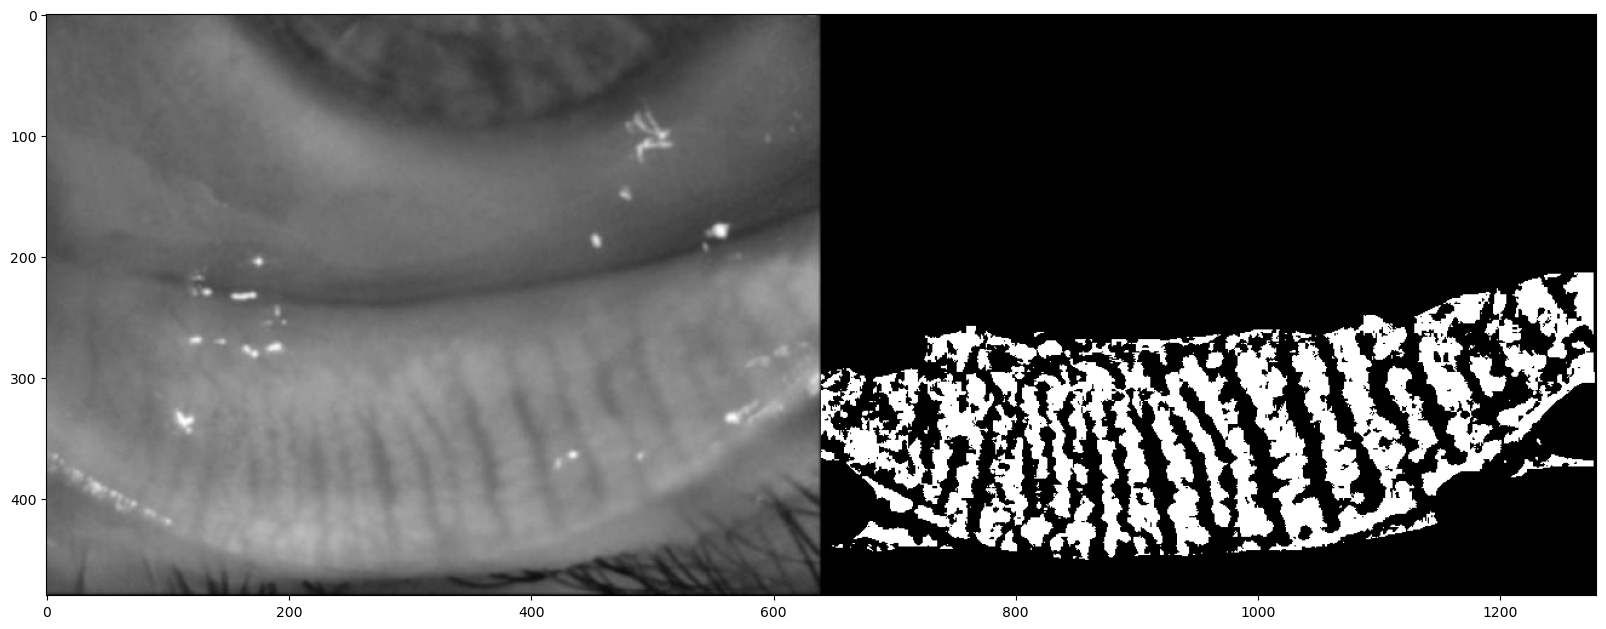

In [154]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30,30))
mask2 = cv2.morphologyEx(mask, cv2.MORPH_ERODE, kernel=kernel)
dummy = mask2*res_athr_clahe*255
imshow(cv2.hconcat([img, dummy]), cmap='gray')

In [ ]:
# Sobel Filtering
res_sbl = cv2.Sobel(img, dx=0, dy=1, ddepth=-1, ksize=3)
imshow(res_sbl>10, cmap='gray')